In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import math  
#Integrantes
#Juan Manuel Jimenez
#Ian Cristobal Chona
#Camilo Franco Beltran

In [2]:
#Exercise 1
def getStats(D):
    rows,columns=D.shape
    u=D.sum(axis=0)/rows
    ones=np.ones(columns)
    z=D-u.T    
    covM=np.dot(z.T,z)/rows
    return u,covM

def getEigen(D):
    w,v=LA.eig(D)
    return w,v

In [3]:
## Unit Test for exercise 1
A = np.array([[17, 24,  1,  8, 15],
 [23,  5,  7, 14, 16],
 [ 4,  6, 13, 20, 22],
 [10, 12, 19, 21,  3],
 [11, 18, 25,  2,  9]])

## Ground truth for mean and covariance
meanA = np.array([13., 13., 13., 13., 13.])
covA = np.array([[ 42.,   4., -30., -15.,  -1.],
 [  4.,  52.,  -6., -35., -15.],
 [-30.,  -6.,  72.,  -6., -30.],
 [-15., -35.,  -6.,  52.,   4.],
 [ -1., -15., -30.,   4.,  42.]])
mean, cov = getStats(A)
print(mean == meanA)
print(cov == covA)

## Ground truth for eigenvalues and eigentvectors
vals, vectors = getEigen(cov)
evectorsA = np.array([[ 4.47213595e-01,  3.69278287e-01,  6.62726001e-01,  2.46564896e-01, -4.04516436e-01],
 [ 4.47213595e-01, -5.47694274e-01, -2.46564896e-01,  6.62726001e-01,  -5.56615971e-03],
 [ 4.47213595e-01,  3.56831975e-01,  9.45136083e-17,  4.88608514e-15,  8.20165192e-01],
 [ 4.47213595e-01, -5.47694274e-01,  2.46564896e-01, -6.62726001e-01, -5.56615971e-03],
 [ 4.47213595e-01,  3.69278287e-01, -6.62726001e-01, -2.46564896e-01, -4.04516436e-01]])
evectorsB = np.array([[ 4.04516436e-01,  2.46564896e-01, -4.47213595e-01, 6.62726001e-01,  3.69278287e-01],
       [ 5.56615971e-03,  6.62726001e-01, -4.47213595e-01, -2.46564896e-01, -5.47694274e-01],
       [-8.20165192e-01,  6.94117907e-15, -4.47213595e-01, 2.32193763e-16,  3.56831975e-01],
       [ 5.56615971e-03, -6.62726001e-01, -4.47213595e-01, 2.46564896e-01, -5.47694274e-01],
       [ 4.04516436e-01, -2.46564896e-01, -4.47213595e-01, -6.62726001e-01,  3.69278287e-01]])
print(np.isclose(np.transpose(vectors), evectorsA))
print(np.isclose(np.transpose(vectors), evectorsB)) ## this must be true if linalg.eig is used instead of eigh

[ True  True  True  True  True]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[ True False False False False]
 [False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [False False False False  True]]


(0, 1) - sepal_length - sepal_width


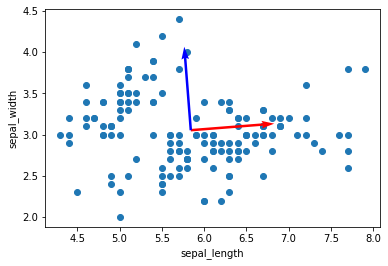

[[ 0.99693955  0.07817635]
 [-0.07817635  0.99693955]]
(0, 2) - sepal_length - petal_length


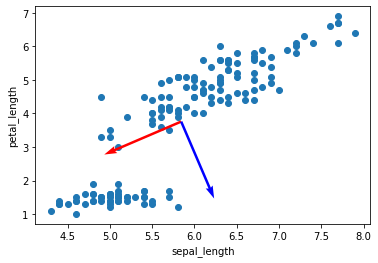

[[-0.91920275 -0.39378459]
 [ 0.39378459 -0.91920275]]
(0, 3) - sepal_length - petal_width


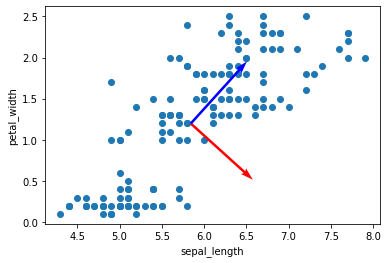

[[ 0.7414199  -0.67104138]
 [ 0.67104138  0.7414199 ]]
(1, 2) - sepal_width - petal_length


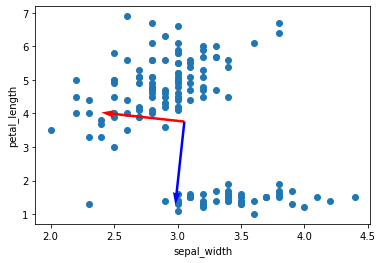

[[-0.99414596  0.10804539]
 [-0.10804539 -0.99414596]]
(1, 3) - sepal_width - petal_width


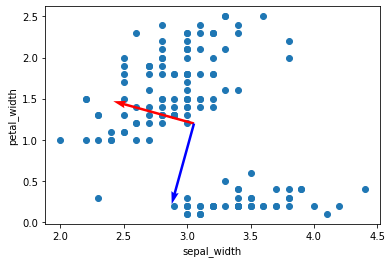

[[-0.963885    0.26631882]
 [-0.26631882 -0.963885  ]]
(2, 3) - petal_length - petal_width


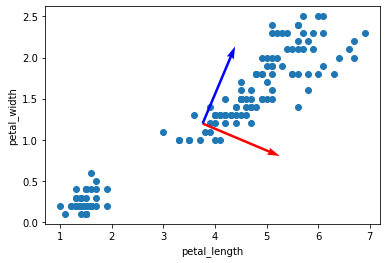

[[ 0.92154695 -0.38826694]
 [ 0.38826694  0.92154695]]


In [4]:
#Exercise 2
irisset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')._get_numeric_data()
colNames=list(irisset.columns)
irisset=irisset.values
#Usamos una liberaria para iterar sobre combinaciones
for combo in combinations(np.arange(irisset.shape[1]), 2):
    plt.clf()
    D=np.column_stack((irisset[:,combo[0]],irisset[:,combo[1]]))
    u,covM=getStats(D)
    w,v=getEigen(covM)    
    plt.scatter(irisset[:,combo[0]],irisset[:,combo[1]])
    plt.quiver(*u, *v[0], color=['r'], scale=4)
    plt.quiver(*u, *v[1], color=['b'], scale=4)
    print(combo,"-",colNames[combo[0]],"-",colNames[combo[1]])
    plt.xlabel(colNames[combo[0]])
    plt.ylabel(colNames[combo[1]])
    plt.show()
    print(v)

<Figure size 432x288 with 0 Axes>

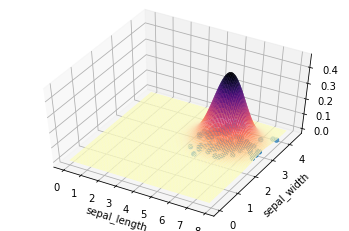

<Figure size 432x288 with 0 Axes>

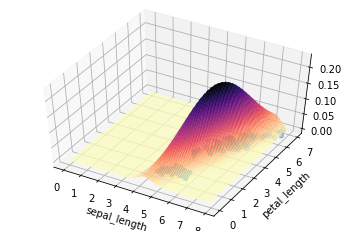

<Figure size 432x288 with 0 Axes>

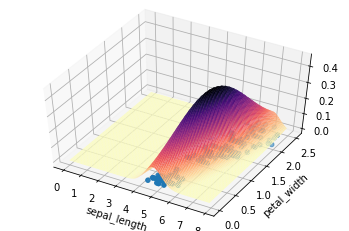

<Figure size 432x288 with 0 Axes>

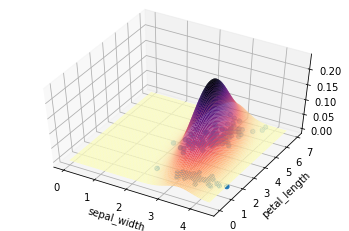

<Figure size 432x288 with 0 Axes>

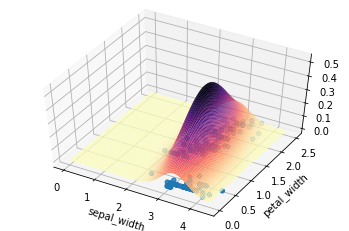

<Figure size 432x288 with 0 Axes>

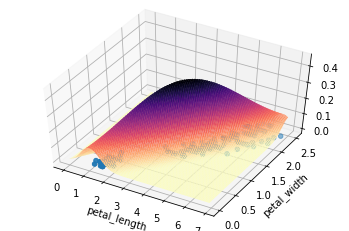

In [5]:
#Exercise 3
#Este codigo y el anterior sirve para cualquier set de datos!
#https://raw.githubusercontent.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/master/cruise_ship_info.csv
#https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

irisset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')._get_numeric_data()
colNames=list(irisset.columns)
irisset=irisset.values
for combo in combinations(np.arange(irisset.shape[1]), 2):
    plt.clf()
    D=np.column_stack((irisset[:,combo[0]],irisset[:,combo[1]]))
    u,covM=getStats(D)
    #x = D[:,0]
    #y = D[:,1]
    x=np.linspace(0, np.amax(D[:,0]), num=100)
    y=np.linspace(0, np.amax(D[:,1]), num=100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y)) 
    Z = multivariate_normal(u, covM).pdf(pos)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z,rstride=1, cstride=1,cmap='magma_r', edgecolor='none')
    ax.scatter(D[:,0], D[:,1], 0)
    ax.set_xlabel(colNames[combo[0]])
    ax.set_ylabel(colNames[combo[1]])
    ax.view_init(50, 300)
    plt.show()






In [6]:
#Exercise 4
irisset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')._get_numeric_data()
irisset=irisset.values
irisset2 = np.copy(irisset)
irisset3= np.copy(irisset)
irisset4=np.copy(irisset)
def normalize(D):
    for i in range(D.shape[1]):
        maxi=D[:,i].max()
        mini=D[:,i].min()
        D[:,i]=(D[:,i]-mini)/(maxi-mini)        
    return D
def standardize(D):
    for i in range(D.shape[1]):
        mean=D[:,i].mean()
        #std=D[:,i].std()
        std=math.sqrt(D[:,i].var())
        D[:,i]=(D[:,i]-mean)/std
    return D


irisNorm=normalize(irisset2)
irisStand=standardize(irisset3)
u,covM=getStats(irisNorm)
u2,covM2=getStats(irisStand)
u3,covM3=getStats(irisset4)
print("Normalized cov matrix")
print(covM)
print("Standardize cov matrix")
print(covM2)
print("Original cov matrix")
print(covM3)



Normalized cov matrix
[[ 0.05255573 -0.00451466  0.05956644  0.05942798]
 [-0.00451466  0.03242199 -0.02256836 -0.0203463 ]
 [ 0.05956644 -0.02256836  0.08883726  0.09094244]
 [ 0.05942798 -0.0203463   0.09094244  0.10043951]]
Standardize cov matrix
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
Original cov matrix
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


In [8]:
df2 = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")[["petal_width", "petal_length", "sepal_width", "sepal_length"]].values
n = normalize(df2)
print(np.isclose(np.min(n, axis=0), np.zeros(4)))
print(np.isclose(np.max(n, axis=0), np.ones(4)))

s = standardize(df2)
mean, covariances = getStats(s)
print(np.isclose(mean, np.zeros(4)))
print(np.isclose(np.diag(covariances), np.ones(4)))

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


In [17]:
#Podermos observar como la matriz estandarizada tiene una simetria muy particular, su diagonal es 1
#Esto cobra mucho sentido ya que esta diciendo que el dato es una combinacion lineal de 1 consigo
#mismo,por otro lado se siguen reflejando que las matrices son simetricas donde varij=varji
#en conclusion tenemos que trabajar con una matriz de covarianza estandarizada ya que estamos
#describiendo la variacion de nuestros datos unicamente en terminos de las caracterisitcas propias,ademas de lo 
#potente que es trabajar con matrices simetricas para diferentes calculos algebraicos.
#del conjunto y no en terminos relativos.
#De la matriza normalizada solo podemos concluir que todos varianzas estan mas cercas unas de otras.
#Adicionalmente tenemos que la matriz de covarianza de los datos estandarizados es igual a la matriz de correlacion
#Esto rectifica lo mencionado en el ejercicio 1.4, donde se afirmo que para que ambas matrices fueran iguales, los datos
#debian estar estandarizados, que es cuando su la diagonal de la matriz de covarianza es 1.!
#Se puede confirmar con el siguiente codigo

#print("Standardize corr Matrix")  
#print(np.corrcoef(irisset))

In [18]:
#for combo in combinations(np.arange(9), 8):
 #   print(combo)

## Feedback
### Exercise 1
Excelente trabajo. Muy detallado. No estoy muy seguro con lo último de los eigenvectors, pero aún así asigno 4/4

### Exercise 2
1. the computation of eigenvectors is not correct. Please the manual properly (what are cols, what are rows). 0.75
2. ok (but here you see that the eigenvectors are not correct)
3. nice work
4. nice work

I assign 3.75/4

Total: 7.75/8